# Analysis of PolyaClassifier site definition for *A. thaliana*

**Purpose**: To identify 6mer motifs important to cleavage site definition in *A. thaliana* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'arabidopsis_thaliana'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-6'
kmer      = 6


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_atha_6mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 9358

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/arabidopsis_thaliana/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-6


In [8]:
## Load motif family definitions for S. cerevisiae

atha_definitions = {'patterns' : {}}

# By pattern
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.atha.{kmer}mers.patterns.pickle'), mode = 'rb') as handle:
        atha_definitions['patterns'][kmer] = pickle.load(handle)


In [9]:
## Load processed motif importance data

with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.summaries.pickle'), mode = 'rb') as handle:
    motif_summaries = pickle.load(handle)
    
cond1 = (motif_summaries['species'] == species)
cond2 = (motif_summaries['modeltype'] == modeltype)
cond3 = (motif_summaries['kmer'] == kmer)
    
motif_summaries = motif_summaries.loc[cond1 & cond2 & cond3].copy()
print(motif_summaries.shape)


(4096, 28)


In [10]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.family_profiles.pickle'), mode = 'rb') as handle:
    mfam_importance = pickle.load(handle)
    

In [11]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)
    
sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 255


# ANALYSIS

In [12]:
family_cmap = {
    'A-rich'          : '#2278b5', 
    'T-rich'          : '#2fa148', 
    'TGTA-containing' : '#fcb316', 
    'Other'           : '#f7f8f8',
}

## Overall motif family importance profiles

#### Individual motif families

pattern_A-rich    : Peak frequency 10.562 @ 192


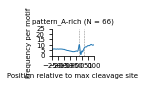

pattern_T-rich    : Peak frequency 21.694 @ -9


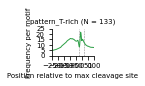

pattern_TGTA-containing: Peak frequency 18.706 @ -47


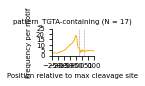

In [13]:
region = (-250,100)
smoothing = 10

for motfam,motdict in mfam_importance[species][modeltype][config].items():
        
    try:
        
        motcolor = family_cmap[motfam.replace("pattern_", "")]
        
        fig,ax = plt.subplots(1,1, figsize = (0.75,0.5))

        xs           = motdict['data']['xs']
        means        = motdict['data']['freqs'] / len(motdict['motifs'])
        means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()

        sns.lineplot(x = xs, y = means_smooth, color = motcolor, label = motfam, lw = 1, ax = ax)
        print(f"{motfam:18}: Peak frequency {np.nanmax(means_smooth):5.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

        ax.axhline(y =   0, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
        ax.axvline(x = -20, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
        ax.axvline(x =  20, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

        ax.set_xlim(region)
        ax.xaxis.set_major_locator(MultipleLocator(50))
        ax.set_xlabel("Position relative to max cleavage site")

        ax.set_ylim(0,25)
        ax.yaxis.set_major_locator(MultipleLocator(5))
        ax.set_ylabel("Frequency per motif")

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.set_title(f"{motfam} (N = {len(motdict['motifs'])})", fontsize = 7)
        ax.get_legend().remove()

        plt.savefig(os.path.join(OUTDIR, f'family_importance.{motfam.replace("/","")}.frequency.svg'), format = 'svg', dpi = 600, transparent = True)
        plt.show()

    except KeyError:
        plt.close()
        continue
    

pattern_A-rich    : Peak per-site 2.092 @ -21


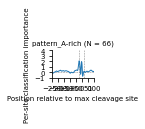

pattern_T-rich    : Peak per-site 3.552 @ -4


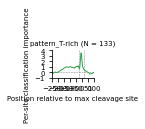

pattern_TGTA-containing: Peak per-site 2.896 @ -45


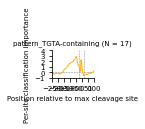

In [14]:
region = (-250,100)
smoothing = 10

for motfam,motdict in mfam_importance[species][modeltype][config].items():
        
    try:
        
        motcolor = family_cmap[motfam.replace("pattern_", "")]
            
        fig,ax = plt.subplots(1,1, figsize = (0.75,0.5))

        xs           = motdict['data']['xs']
        means        = -1*motdict['data']['means']
        means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()

        sns.lineplot(x = xs, y = means_smooth, color = motcolor, label = motfam, lw = 1, ax = ax)
        print(f"{motfam:18}: Peak per-site {np.nanmax(means_smooth):5.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

        ax.axhline(y =   0, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
        ax.axvline(x = -20, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
        ax.axvline(x =  20, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

        ax.set_xlim(region)
        ax.xaxis.set_major_locator(MultipleLocator(50))
        ax.set_xlabel("Position relative to max cleavage site")

        ax.set_ylim((-1,4))
        ax.yaxis.set_major_locator(MultipleLocator(1))
        ax.set_ylabel("Per-site classification importance")

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.set_title(f"{motfam} (N = {len(motdict['motifs'])})", fontsize = 7)
        ax.get_legend().remove()

        plt.savefig(os.path.join(OUTDIR, f'family_importance.{motfam.replace("/","")}.per_site.svg'), format = 'svg', dpi = 600, transparent = True)
        plt.show()

    except KeyError:
        plt.close()
        continue


#### Family importance profiles using motif-normalized sum importance scores

pattern_A-rich    : Peak sum-norm  23.179 @ -20
pattern_T-rich    : Peak sum-norm  75.810 @ -6
pattern_TGTA-containing: Peak sum-norm  57.565 @ -47


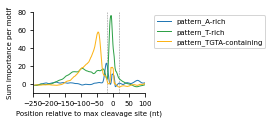

In [15]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

region = (-250,100)
smoothing = 10

ylims = (-10,80)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    xs           = motdict['data']['xs']
    means        = -1*motdict['data']['means_weights'] / len(motdict['motifs'])
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    print(f"{motfam:18}: Peak sum-norm {np.nanmax(means_smooth):7.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

    sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("pattern_","")], label = motfam, lw = 1, ax = ax)

for x in [-20,20]:
    ax.axvline(x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(ylims)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.set_ylabel("Sum importance per motif")
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.sum_norm.wide.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


pattern_A-rich    : Peak sum-norm  23.179 @ -20
pattern_T-rich    : Peak sum-norm  75.810 @ -6
pattern_TGTA-containing: Peak sum-norm  57.565 @ -47


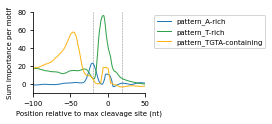

In [16]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

region = (-100,50)
smoothing = 10

ylims = (-10,80)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    xs           = motdict['data']['xs']
    means        = -1*motdict['data']['means_weights'] / len(motdict['motifs'])
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    print(f"{motfam:18}: Peak sum-norm {np.nanmax(means_smooth):7.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

    sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("pattern_","")], label = motfam, lw = 1, ax = ax)

for x in [-20,20]:
    ax.axvline(x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(ylims)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.set_ylabel("Sum importance per motif")
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.sum_norm.zoom.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


## Top individual motifs in each region

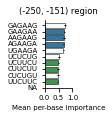

      motif  frequency     score   conf_lo   conf_hi  family  error_lo
109  GAGAAG       1039  0.728744  0.753875  0.703613   Other  0.025131
105  GAAGAA       1649  0.706914  0.725473  0.688356  A-rich  0.018559
25   AAGAAG       1676  0.696141  0.714269  0.678014  A-rich  0.018127
45   AGAAGA       1482  0.693334  0.712545  0.674124  A-rich  0.019210
167  UGAAGA       1303  0.663274  0.683075  0.643474   Other  0.019801
153  UCUCUG        652  0.521298  0.551634  0.490962   Other  0.030336
158  UCUUCU       1048  0.498734  0.525139  0.472330  T-rich  0.026405
90   CUUCUU        941  0.485513  0.511958  0.459068  T-rich  0.026445
86   CUCUGU        467  0.466942  0.504876  0.429008   Other  0.037934
205  UUCUUC        918  0.463966  0.489218  0.438715  T-rich  0.025251
0.7538753644053211


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (-250,-151), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


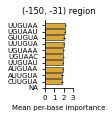

      motif  frequency     score   conf_lo   conf_hi           family  \
213  UUGUAA       1682  2.169004  2.232409  2.105599  TGTA-containing   
174  UGUAAU       1714  2.101923  2.168135  2.035711  TGTA-containing   
122  GUUGUA        962  2.020109  2.096973  1.943246  TGTA-containing   
238  UUUGUA       2116  2.008470  2.062056  1.954884  TGTA-containing   
172  UGUAAA       1058  1.978285  2.058183  1.898388  TGTA-containing   
173  UGUAAC        681  1.972273  2.068603  1.875943  TGTA-containing   
214  UUGUAU       1683  1.917059  1.976577  1.857541  TGTA-containing   
57   AUGUAA       1075  1.888276  1.975165  1.801387  TGTA-containing   
62   AUUGUA        848  1.851842  1.943165  1.760519  TGTA-containing   
91   CUUGUA        879  1.825554  1.902769  1.748340  TGTA-containing   

     error_lo  
213  0.063405  
174  0.066212  
122  0.076863  
238  0.053586  
172  0.079897  
173  0.096330  
214  0.059518  
57   0.086889  
62   0.091323  
91   0.077215  
2.2324090261110787


In [18]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (-150,-31), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


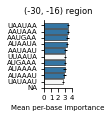

      motif  frequency     score   conf_lo   conf_hi  family  error_lo
134  UAAUAA        433  3.359808  3.506465  3.213151  A-rich  0.146657
28   AAUAAA        610  3.348463  3.494073  3.202854  A-rich  0.145610
31   AAUGAA        296  3.339887  3.522553  3.157222  A-rich  0.182666
51   AUAAUA        355  3.288330  3.450215  3.126445  A-rich  0.161885
29   AAUAAU        341  3.037060  3.209029  2.865091  A-rich  0.171969
189  UUAAUA        298  3.006203  3.173241  2.839164   Other  0.167038
56   AUGAAA        244  2.991156  3.171321  2.810990  A-rich  0.180165
49   AUAAAA        348  2.917922  3.110870  2.724975  A-rich  0.192947
50   AUAAAU        360  2.896059  3.059739  2.732379  A-rich  0.163680
139  UAUAAU        328  2.735382  2.906169  2.564595   Other  0.170787
3.5225529152286557


In [19]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (-30,-16), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


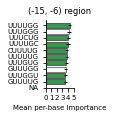

      motif  frequency     score   conf_lo   conf_hi  family  error_lo
249  UUUUGG        363  4.311469  4.542997  4.079941  T-rich  0.231528
236  UUUGGG        160  4.100281  4.453618  3.746943   Other  0.353337
231  UUUCUG        158  4.052170  4.376600  3.727740  T-rich  0.324430
248  UUUUGC        176  4.042884  4.370459  3.715309  T-rich  0.327575
98   CUUUUG        231  3.805024  4.078706  3.531342  T-rich  0.273682
253  UUUUUG        439  3.792928  4.002169  3.583687  T-rich  0.209241
240  UUUGUG        258  3.673017  3.940153  3.405882  T-rich  0.267136
127  GUUUGG        137  3.564768  3.883556  3.245980   Other  0.318788
237  UUUGGU        358  3.543229  3.740063  3.346395  T-rich  0.196834
131  GUUUUG        327  3.520158  3.742876  3.297441  T-rich  0.222718
4.5429965967547234


In [20]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (-15,-6), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,5), xtickint = 1, verbose = True
                     )


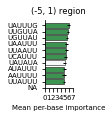

      motif  frequency     score   conf_lo   conf_hi  family  error_lo
148  UAUUUG        104  5.948355  6.424225  5.472485  T-rich  0.475870
217  UUGUUA        109  5.892850  6.181455  5.604244  T-rich  0.288605
182  UGUUAU        117  5.511211  5.832009  5.190413  T-rich  0.320798
136  UAAUUU        120  5.393260  5.797765  4.988755  T-rich  0.404505
190  UUAAUU        109  5.365733  5.731416  5.000049  T-rich  0.365684
151  UCAUUU        118  5.242548  5.660630  4.824466  T-rich  0.418082
140  UAUAUA        104  5.029935  5.414141  4.645730   Other  0.384205
53   AUAUUU        100  4.916044  5.289314  4.542773  T-rich  0.373271
34   AAUUUU        116  4.850638  5.331498  4.369779  T-rich  0.480859
198  UUAUUU        193  4.840747  5.143430  4.538063  T-rich  0.302683
6.424225041738285


In [21]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (-5,1), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,7), xtickint = 1, verbose = True
                     )


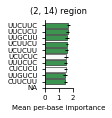

      motif  frequency     score   conf_lo   conf_hi  family  error_lo
205  UUCUUC        218  1.678890  1.778777  1.579003  T-rich  0.099887
202  UUCUCU        239  1.647618  1.763505  1.531731  T-rich  0.115887
210  UUGCUU        195  1.611473  1.743673  1.479272  T-rich  0.132200
158  UCUUCU        240  1.594170  1.685297  1.503043  T-rich  0.091127
154  UCUCUU        256  1.576305  1.674257  1.478352  T-rich  0.097953
152  UCUCUC        130  1.528778  1.655211  1.402344   Other  0.126434
230  UUUCUC        184  1.500527  1.609060  1.391994  T-rich  0.108533
85   CUCUCU        137  1.488865  1.600299  1.377430   Other  0.111434
215  UUGUCU        169  1.455513  1.615279  1.295747  T-rich  0.159766
90   CUUCUU        209  1.453480  1.561114  1.345846  T-rich  0.107634
1.778777083759522


In [22]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (2,14), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


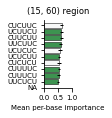

      motif  frequency     score   conf_lo   conf_hi  family  error_lo
87   CUCUUC        186  0.634791  0.688188  0.581394   Other  0.053397
158  UCUUCU        427  0.616557  0.665369  0.567745  T-rich  0.048812
90   CUUCUU        403  0.613953  0.657657  0.570248  T-rich  0.043705
205  UUCUUC        430  0.595142  0.642104  0.548181  T-rich  0.046962
152  UCUCUC        223  0.572928  0.633736  0.512121   Other  0.060808
154  UCUCUU        509  0.535049  0.574228  0.495870  T-rich  0.039179
85   CUCUCU        247  0.529546  0.588093  0.470999   Other  0.058547
97   CUUUUC        317  0.527222  0.573351  0.481093  T-rich  0.046129
94   CUUUCU        292  0.516197  0.564045  0.468348  T-rich  0.047849
202  UUCUCU        445  0.496949  0.546393  0.447505  T-rich  0.049444
0.6881876833225705


In [23]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][6]['family'], sigmots, 
                      (15,60), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )
